In [1]:
conda install -c conda-forge/label/cf202003 pandas-profiling

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv('temporal.csv')
df.head(10)

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [3]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
Mes                 194 non-null object
data science        194 non-null int64
machine learning    194 non-null int64
deep learning       194 non-null int64
categorical         194 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}','machine learning':'{:.2%}'}
df['Mes'] = pd.to_datetime(df['Mes'])
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


In [7]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [8]:
df.head(10).style.format(format_dict).background_gradient(subset = ['data science', 'machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [9]:
df.head().style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


In [10]:
df.head(10).style.format(format_dict).background_gradient(subset = ['data science', 'machine learning'],cmap='BuGn').highlight_max(color='yellow')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


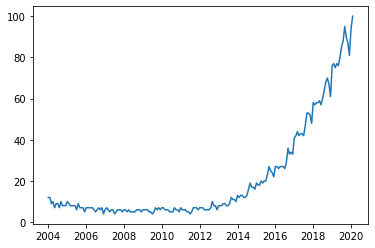

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['Mes'], df['data science'], label='data science') #The parameter label is to indicate the legend. 
#This doesn't mean that it will be shown, we'll have to use another command that I'll explain later.

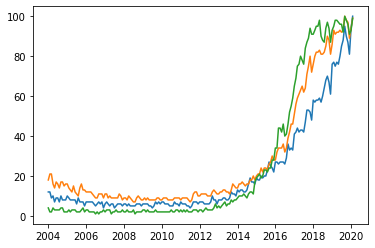

In [12]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')

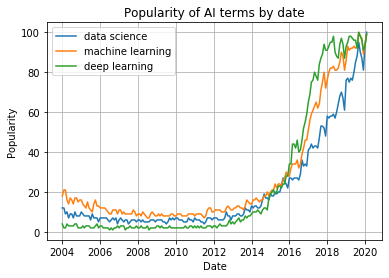

In [13]:
%matplotlib inline
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()

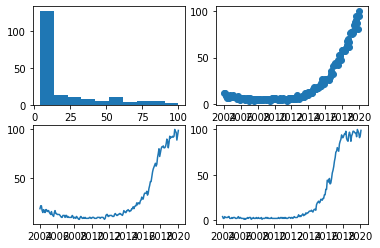

In [14]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])

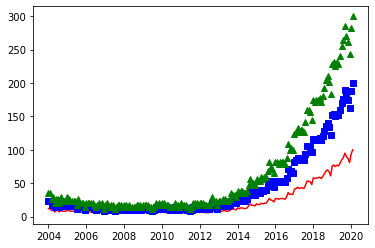

In [15]:
plt.plot(df['Mes'], df['data science'], 'r-')
plt.plot(df['Mes'], df['data science']*2, 'bs')
plt.plot(df['Mes'], df['data science']*3, 'g^')

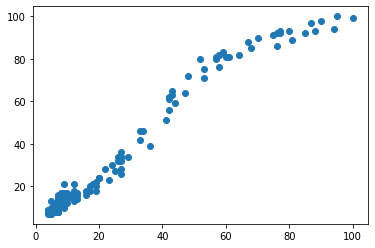

In [16]:
plt.scatter(df['data science'], df['machine learning'])

<BarContainer object of 194 artists>

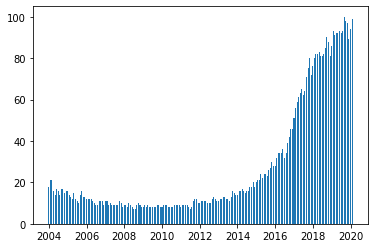

In [17]:
plt.bar(df['Mes'], df['machine learning'], width=20)

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <a list of 15 Patch objects>)

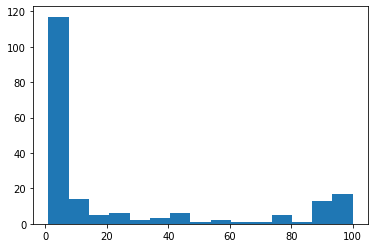

In [18]:
plt.hist(df['deep learning'], bins=15)

Text(2006-01-01, 50, 'Notice something?')

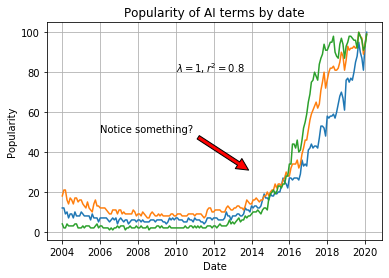

In [19]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.text(x='2010-01-01', y=80, s=r'$\lambda=1, r^2=0.8$')
#Coordinates use the same units as the graph
plt.annotate('Notice something?', xy=('2014-01-01', 30), xytext=('2006-01-01', 50), arrowprops={'facecolor':'red', 'shrink':0.05})

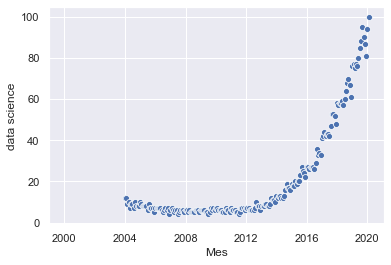

In [20]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Mes'], df['data science'])

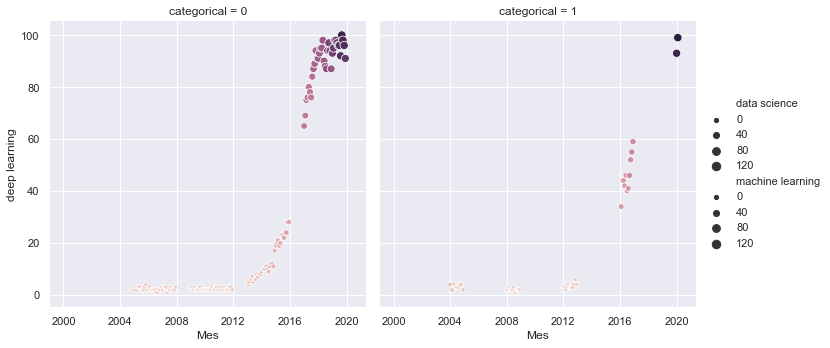

In [21]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning', col='categorical', data=df)

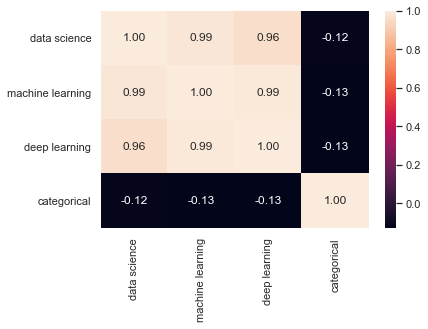

In [22]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

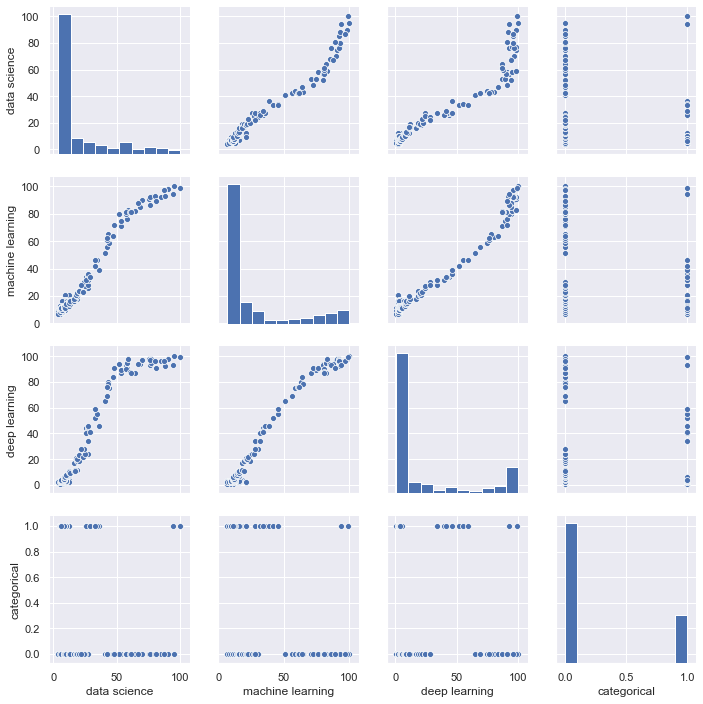

In [23]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


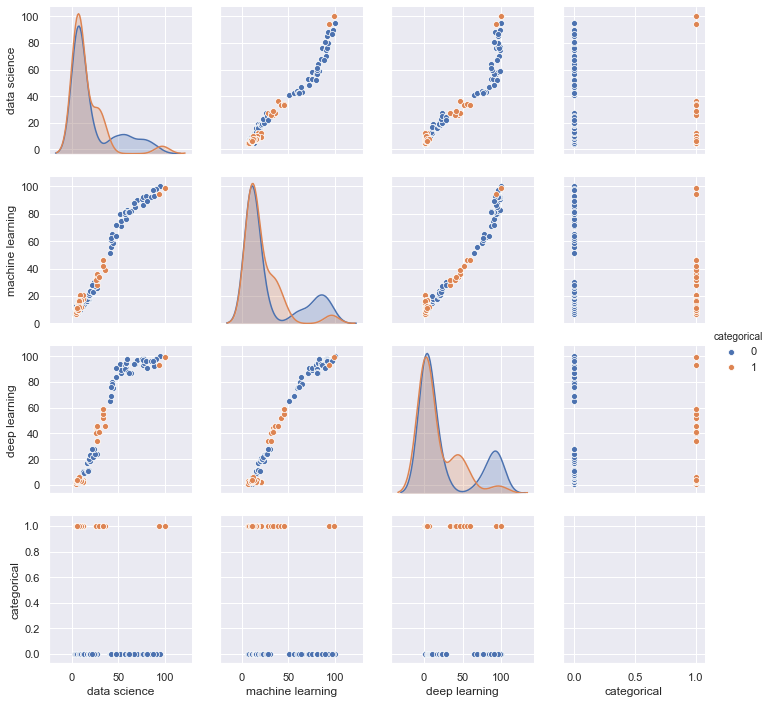

In [24]:
sns.pairplot(df, hue='categorical')

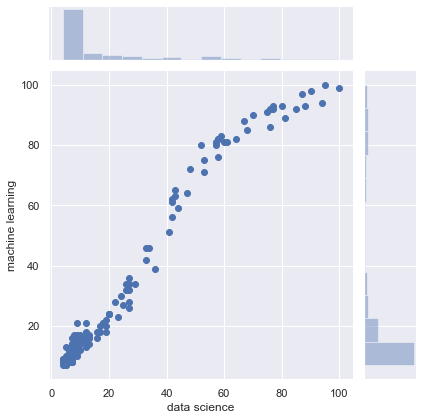

In [25]:
sns.jointplot(x='data science', y='machine learning', data=df)

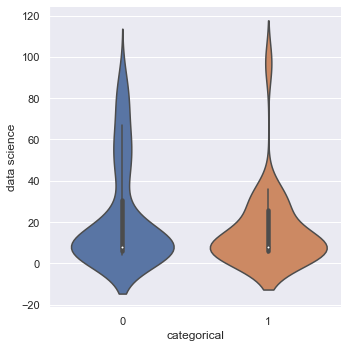

In [26]:
sns.catplot(x='categorical', y='data science', kind='violin', data = df)

Text(0.5, 1.0, 'Machine Learning')

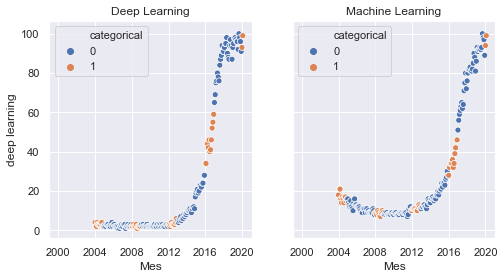

In [27]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical",
data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical",
data=df, ax=axes[1])
axes[1].set_title('Machine Learning')

In [28]:
from bokeh.plotting import figure, output_file, save
output_file('data_science_popularity.html')

In [29]:
p = figure(title='data science', x_axis_label='Mes',
y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend='popularity',
line_width=2)
save(p)

'/Users/berthaliliaromerobaizabal/Desktop/Clientes/Jorge García/data_science_popularity.html'

In [31]:
output_file('multiple_graphs.html')
s1 = figure(width=250, plot_height=250, title='data science')
s1.circle(df['Mes'], df['data science'], size=10, color='navy',
alpha=0.5)
s2 = figure(width=250, height=250, x_range=s1.x_range,
y_range=s1.y_range, title='machine learning') #share both axis range
s2.triangle(df['Mes'], df['machine learning'], size=10, color='red',
alpha=0.5)
s3 = figure(width=250, height=250, x_range=s1.x_range, title='deep learning') #share only one axis range
s3.square(df['Mes'], df['deep learning'], size=5, color='green',
alpha=0.5)
p = gridplot([[s1, s2, s3]])
save(p)

NameError: name 'gridplot' is not defined